---
<h1 style="text-align: center;">Data Understanding:</h1>
<h2 style="text-align: center;">Bank Marketing</h2>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 16/07/2024

---
---

# Introdução

Nesta fase do projeto, realizaremos uma análise exploratória detalhada dos dados do dataset "Bank Marketing". O objetivo desta análise é entender melhor a estrutura dos dados, identificar padrões, verificar a distribuição das variáveis e descobrir possíveis correlações que possam influenciar os resultados.

As variáveis que serão exploradas incluem:

| Nome da variável | Papel          | Tipo       | Demográfico           | Descrição                                                                                                                                                                                                                                                                                                                                                                                                                                         | Unidades | Valores ausentes |
|------------------|----------------|------------|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|------------------|
| idade            | Característica | Inteiro    | Idade                 |                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| trabalho         | Característica | Categórico | Ocupação              | Tipo de emprego (categórico: 'Admin.', 'Blue-collar', 'Entrepreneur', 'Householdant', 'Management', 'Aposentado', 'Autônomo', 'Serviços', 'Estudante', 'Técnico', 'Desempregado', 'Desconhecido')                                                                                                                                                                                                                                                 |          | Não              |
| conjugal         | Característica | Categórico | Estado civil          | estado civil (categórico: 'divorciado', 'casado', 'solteiro', 'desconhecido'; nota: 'divorciado' significa divorciado ou viúvo)                                                                                                                                                                                                                                                                                                                   |          | Não              |
| educação         | Característica | Categórico | Nível de escolaridade | (categórico: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')                                                                                                                                                                                                                                                                                                              |          | Não              |
| inadimplência    | Característica | Binário    |                       | tem crédito inadimplente?                                                                                                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| equilíbrio       | Característica | Inteiro    |                       | saldo médio anual                                                                                                                                                                                                                                                                                                                                                                                                                                 | Euros    | Não              |
| habitação        | Característica | Binário    |                       | Tem crédito habitação?                                                                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| empréstimo       | Característica | Binário    |                       | Tem empréstimo pessoal?                                                                                                                                                                                                                                                                                                                                                                                                                           |          | Não              |
| contato          | Característica | Categórico |                       | tipo de comunicação de contato (categórico: 'celular', 'telefone')                                                                                                                                                                                                                                                                                                                                                                                |          | Sim              |
| day_of_week      | Característica | Data       |                       | último dia de contato da semana                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| mês              | Característica | Data       |                       | último mês do ano de contato (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                                                 |          | Não              |
| duração          | Característica | Inteiro    |                       | Duração do último contato, em segundos (numérico). Observação importante: esse atributo afeta fortemente o destino de saída (por exemplo, se duration=0 e y='no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o fim da chamada y é obviamente conhecido. Assim, esse insumo só deve ser incluído para fins de benchmark e deve ser descartado se a intenção for ter um modelo preditivo realista. |          | Não              |
| campanha         | Característica | Inteiro    |                       | número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| pdays            | Característica | Inteiro    |                       | número de dias que se passaram após o cliente ter sido contatado pela última vez a partir de uma campanha anterior (numérico; -1 significa que o cliente não foi contatado anteriormente)                                                                                                                                                                                                                                                         |          | Sim              |
| anterior         | Característica | Inteiro    |                       | número de contatos realizados antes desta campanha e para este cliente                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| presultado       | Característica | Categórico |                       | resultado da campanha de marketing anterior (categórico: 'fracasso', 'inexistente', 'sucesso')                                                                                                                                                                                                                                                                                                                                                    |          | Sim              |
| y                | Alvo           | Binário    |                       | O cliente subscreveu um depósito a prazo?                                                                                                                                                                                                                                                                                                                                                                                                         |          |                  |


A análise exploratória incluirá a avaliação de dados faltantes, a identificação de outliers e a verificação de possíveis dados duplicados. Esta etapa é crucial para garantir a qualidade dos dados e a integridade das análises subsequentes.

# Biblioteca utilizadas

1) pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib -> gráficos;

5) seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos

In [1]:
# Instalação das bibliotecas

# %pip install pandas

# %pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

# %pip install seaborn

In [2]:
# Importação das bibliotecas

import pandas as pd

import numpy as np

from scipy.stats import boxcox

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from ucimlrepo import fetch_ucirepo 

from IPython.display import display, Markdown

In [3]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")


In [4]:
# Configurando o modo de exibição do pandas
pd.options.display.float_format = "{:.4f}".format

In [5]:
# Baixando os dados
bank_marketing = fetch_ucirepo(id=222)

In [6]:
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [7]:
# Criando variável que vai ter as variáveis transformada
Xt = X

# Análise Exploratória

In [8]:
# Verificando as 5 primeiras linhas de x
print(X.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  


In [9]:
# Verificando as 5 primeiras linhas de x
print(y.head())

    y
0  no
1  no
2  no
3  no
4  no


## Dados Faltantes

In [10]:
# Verificando dados faltantes
len_x = {}
total_rows = len(X)
for n in X.columns:
    len_x[n] = [len(X[n].dropna())]
    len_x[n].append(total_rows - len_x[n][0])
len_x = pd.DataFrame.from_dict(len_x, orient='index', columns=['Nº Observações', 'Observações Faltantes'])
len_x

,Nº Observações,Observações Faltantes
age,45211,0
job,44923,288
marital,45211,0
education,43354,1857
default,45211,0
balance,45211,0
housing,45211,0
loan,45211,0
contact,32191,13020
day_of_week,45211,0


Podemos observar na tabela acima o número de observações para cada característica e a quantidade de dados faltantes. O banco de dados possui um total de 45.211 observações. As variáveis job (trabalho), education (educação), contact (contato) e poutcome (resultado da campanha anterior) apresentam 288, 1.857, 13.020 e 36.959 dados faltantes, respectivamente.

## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

### Idade

In [11]:
# Resumo estatístico
X["age"].describe()

count   45211.0000
mean       40.9362
std        10.6188
min        18.0000
25%        33.0000
50%        39.0000
75%        48.0000
max        95.0000
Name: age, dtype: float64

In [12]:
# Visualizando a moda
X["age"].mode()

0    32
Name: age, dtype: int64

Ao analisarmos em detalhes os dados relativos à idade dos clientes, percebemos que a média das idades é próxima de 41, variando entre o mínimo de 18 e um máximo de 95. Além disso, podemos observar um desvio padrão de aproximadamente 11, o que indica uma dispersão significativa dos valores. Portanto, em média, os clientes têm idades compreendidas entre 30 e 51 anos.

É importante notar que a média de 41 anos supera tanto a mediana de 39 quanto a moda de 32, sugerindo uma assimetria positiva nos dados devido à presença de idades mais altas no terceiro quartil, que é de 48 anos, próximo do valor máximo.

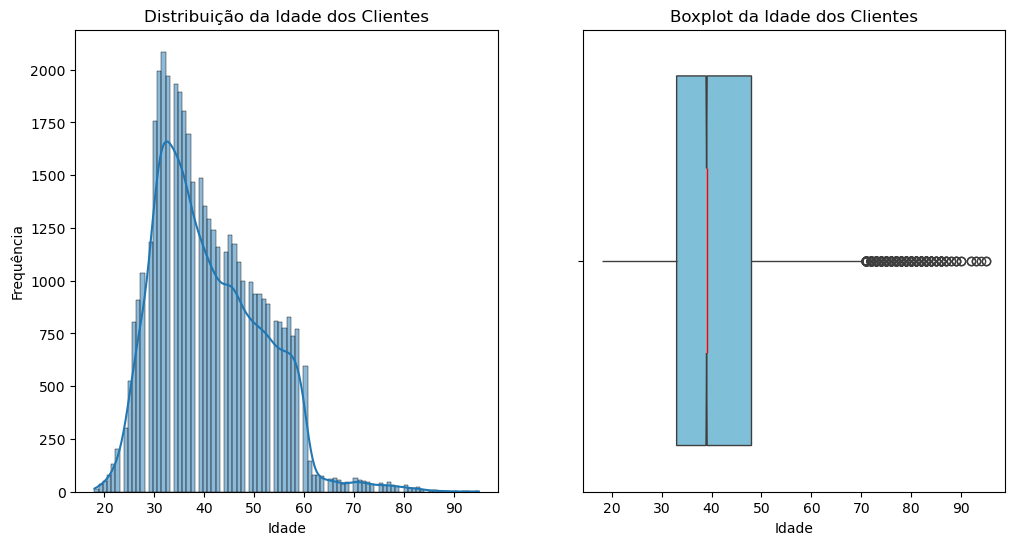

In [13]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(X["age"], kde=True)
plt.title("Distribuição da Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["age"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Idade dos Clientes")
plt.xlabel("Idade")
plt.show()

Como mencionado anteriormente, é possível observar a assimetria positiva nas idades devido à presença de uma pequena parte dos clientes que são pessoas idosas. Após analisar todas as variáveis, vamos propor algumas transformações para tentar melhorar a qualidade dos dados, reduzindo assimetrias e outliers.

### Trabalho

A variável que indica o trabalho exercido por cada cliente é do tipo categórica, podendo ser:

    Admin.: Administrativo
    Blue-collar: Trabalhador manual
    Entrepreneur: Empresário
    Householdant: Trabalhador doméstico
    Management: Gerência
    Retired: Aposentado
    Self-employed: Autônomo
    Services: Serviços gerais
    student: Estudante
    Technician: Técnico
    Unemployed: Desempregado
    Unknown: Desconhecido

Para verificar essa variável, vamos estar analisando a quantidade da frequência de cada classe.

In [14]:
# Criando uma tabela de frequência
job_counts = X['job'].value_counts().sort_index()
print(job_counts*100/44923)

job
admin.          11.5108
blue-collar     21.6637
entrepreneur     3.3101
housemaid        2.7603
management      21.0538
retired          5.0397
self-employed    3.5149
services         9.2469
student          2.0880
technician      16.9112
unemployed       2.9005
Name: count, dtype: float64


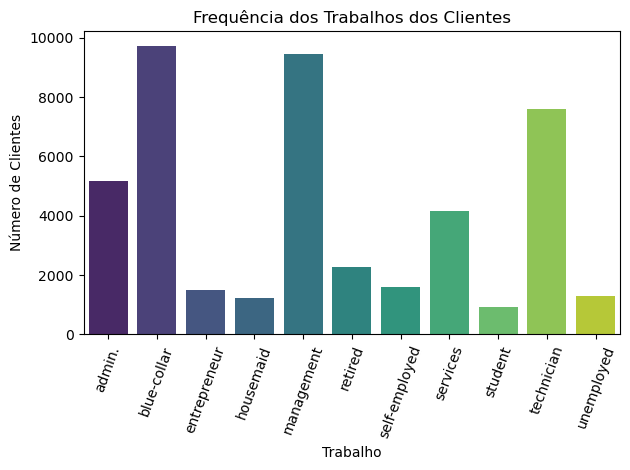

In [15]:
# Criando um gráfico de frequência
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Frequência dos Trabalhos dos Clientes')
plt.xlabel('Trabalho')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=70) 
plt.tight_layout()
plt.show()

Podemos observar tanto na lista acima quanto no gráfico que a base de dados possui mais clientes que desempenham papéis de administradores, trabalhadores manuais, gerência e técnicos, representando 11,51%, 21,6%, 21,05% e 16,91% das 44.923 observações da variável trabalho. É importante lembrar que esta variável possui 1.303 observações classificadas como trabalho desconhecido, além de 288 observações faltantes.

Devido aos problemas como desequilíbrio entre as classes e dados faltantes, na sessão de transformações serão abordados alguns mecanismos para o tratamento dessa variável.

Além disso, podemos verificar quais tipos de trabalhadores são mais propensos a aceitar o produto oferecido pelo banco por meio do telemarketing.

In [16]:
# Criando uma tabela de frequencia para clientes que aceitaram o produto
job_yes_counts = X[y.values == 'yes']['job'].value_counts().sort_index()
job_yes_percentages = job_yes_counts * 100 / job_yes_counts.sum()
print(job_yes_percentages)

job
admin.          12.0076
blue-collar     13.4729
entrepreneur     2.3406
housemaid        2.0742
management      24.7574
retired          9.8192
self-employed    3.5585
services         7.0219
student          5.1189
technician      15.9848
unemployed       3.8440
Name: count, dtype: float64


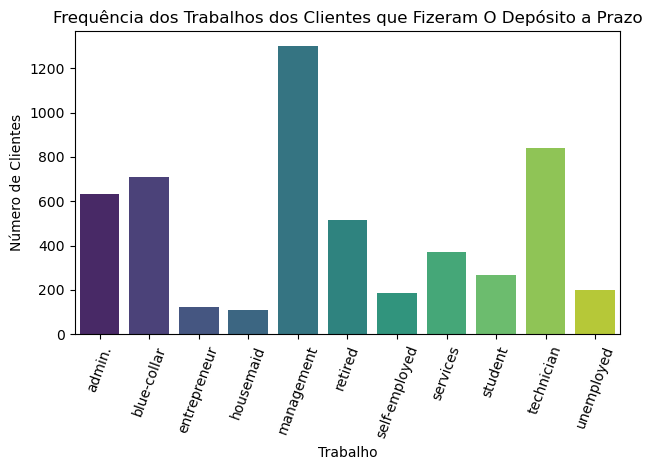

In [17]:
# Criando um gráfico de frequência para clientes que aceitaram o produto
sns.barplot(x=job_yes_counts.index, y=job_yes_counts.values, palette='viridis')
plt.title('Frequência dos Trabalhos dos Clientes que Fizeram O Depósito a Prazo')
plt.xlabel('Trabalho')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=70) 
plt.tight_layout()

Observando os trabalhadores que aceitaram o depósito a prazo, as coisas mudam um pouco. A maioria dos clientes que aceitam tem papéis como gerentes, técnicos, trabalhadores manuais, administradores e aposentados, representando aproximadamente 24,76%, 15,98%, 13,47% e 12,01% das 5.255 observações, respectivamente.

Essa análise é de extrema importância porque, anteriormente, vimos que o banco tem feito telemarketing para muitas pessoas que realizam trabalhos manuais, enquanto gerentes e técnicos representam cerca de 40,73% dos clientes que aceitam o produto.

### Estado Civil

A variável *marital* que representa o estado civil do cliente pode apresentar 4 categorias, sendo elas:

    Married: Casado
    Single: Solteiro
    Divorced: Divorciado ou Viúvo
    Unknown: Desconhecido
    

In [18]:
# Criando uma tabela de frequência
marital_counts = X['marital'].value_counts().sort_index()
marital_percentages = (marital_counts * 100 / sum(marital_counts.values))
print(marital_percentages)

marital
divorced   11.5171
married    60.1933
single     28.2896
Name: count, dtype: float64


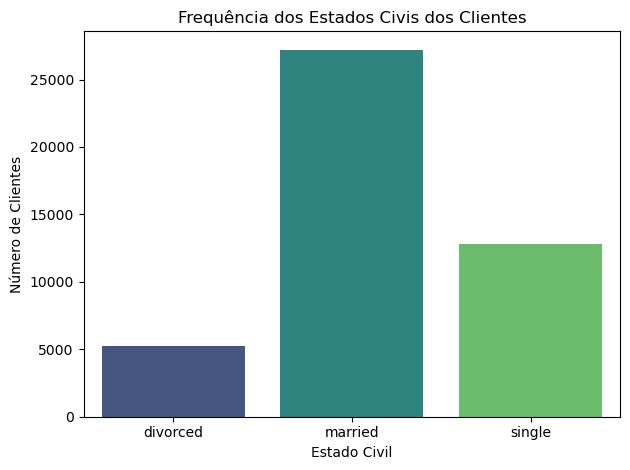

In [19]:
# Criando um gráfico de frêquencia
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')
plt.title('Frequência dos Estados Civis dos Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Como podemos ver tanto na lista de porcentagens quanto no gráfico de barras, os clientes casados, solteiros e divorciados representam aproximadamente 60,19%, 29,29% e 11,51% das 45.211 observações, respectivamente. Além disso, não há nenhum cliente com estado civil desconhecido.

Para entender mais sobre os clientes que aceitam o produto do banco devido ao telemarketing, podemos ver abaixo a análise feita com a variável de estado civil restrita aos clientes que realizaram o depósito a prazo.

In [20]:
# Criando uma tabela de frequencia para clientes que aceitaram o produto
marital_yes_counts = X[y.values == 'yes']['marital'].value_counts().sort_index()
marital_yes_percentages = marital_yes_counts * 100 / marital_yes_counts.sum()
print(marital_yes_percentages)

marital
divorced   11.7603
married    52.0892
single     36.1505
Name: count, dtype: float64


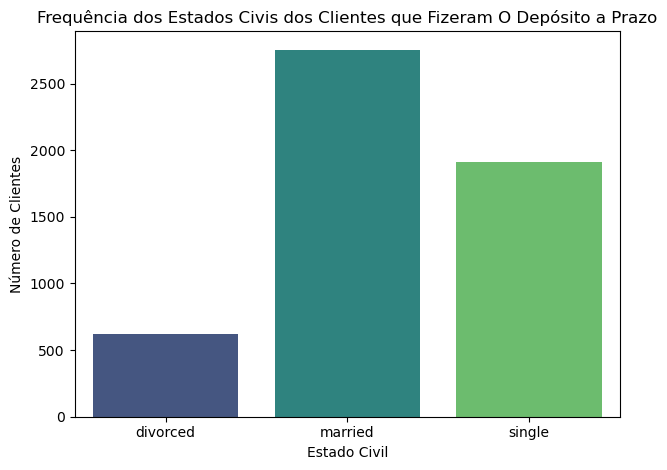

In [21]:
# Criando um gráfico de frequencia para clientes que aceitaram o produto
sns.barplot(x=marital_yes_counts.index, y=marital_yes_counts.values, palette='viridis')
plt.title('Frequência dos Estados Civis dos Clientes que Fizeram O Depósito a Prazo')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Podemos observar que os clientes que geralmente aceitam fazer o depósito a prazo não diferem significativamente do total de clientes do banco. Os clientes casados continuam sendo a maioria, seguidos por solteiros e divorciados, representando aproximadamente 52,09%, 36,15% e 11,76% dos 5.289 clientes que aceitaram o produto decorrente do marketing direto, respectivamente.

### Trabalho e Estado Civil

Uma análise interessante a ser realizada é verificar a proporção de cada tipo de trabalho em relação ao estado civil. Isso pode fornecer insights valiosos sobre o perfil dos clientes antes de criar um modelo categórico. Com essas informações, a instituição financeira pode ajustar suas estratégias de telemarketing de maneira mais eficaz, mesmo antes da conclusão do modelo de aprendizado de máquina. Dessa forma, cada etapa do projeto se torna mais útil e contribui para a implementação de melhorias contínuas nas estratégias de marketing.

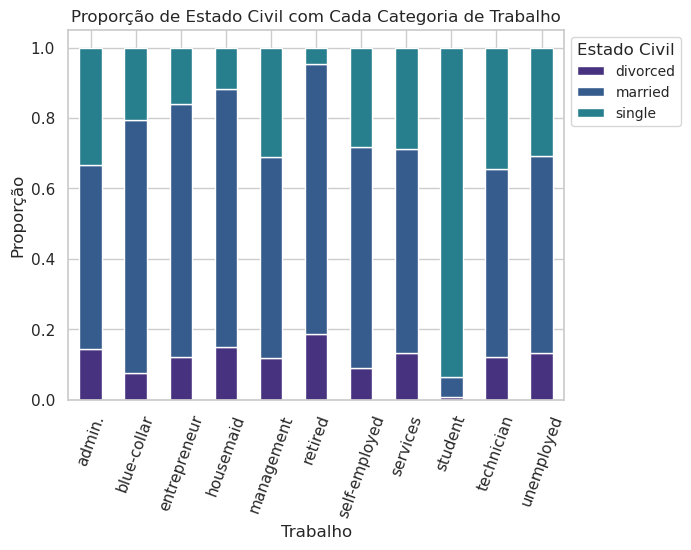

In [22]:
#Criando uma tabela cruzada
job_marital_counts = pd.crosstab(X['job'], X['marital'])
job_marital_counts_normalized = job_marital_counts.div(job_marital_counts.sum(axis=1), axis=0)

# Plotar gráfico de mosaico
sns.set_theme(style="whitegrid", palette='viridis')
job_marital_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Estado Civil com Cada Categoria de Trabalho')
plt.legend(title='Estado Civil', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


Como podemos observar no gráfico acima, que mostra a proporção de estado civil para cada categoria de trabalho, há algumas tendências interessantes. Os estudantes, por exemplo, apresentam mais de 90% de solteiros. Como era de se esperar, as pessoas aposentadas (retired) têm quase 20% de separados ou viúvos, e um pouco mais de 70% são casados.

Analisando os empregos com maior aceitação do produto oferecido pelo telemarketing, podemos dizer que os gerentes e administradores têm um equilíbrio maior entre casados e solteiros. Já as pessoas que fazem trabalhos manuais (blue-collar) apresentam uma maior quantidade de casados e são a segunda ocupação com menos pessoas divorciadas.

Essas informações são valiosas para entender o perfil dos clientes e ajustar as estratégias de marketing de forma mais direcionada e eficaz. Com essas análises, a instituição financeira pode personalizar suas campanhas de telemarketing, aumentando a probabilidade de sucesso ao adaptar as abordagens às características específicas de cada grupo de clientes.

Para obter uma melhor probabilidade de sucesso, podemos verificar a mesma proporção, mas para os clientes que aceitaram fazer o depósito a prazo, conforme mostrado no gráfico abaixo.

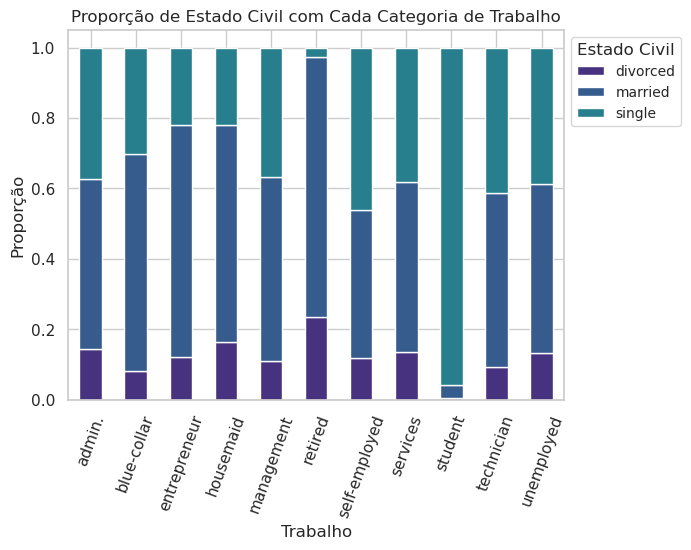

In [23]:
#Criando uma tabela cruzada
job_marital_y_counts = pd.crosstab(X[y.values == 'yes']['job'], X[y.values == 'yes']['marital'])
job_marital_y_counts_normalized = job_marital_y_counts.div(job_marital_y_counts.sum(axis=1), axis=0)

# Plotar gráfico de mosaico
sns.set_theme(style="whitegrid", palette='viridis')
job_marital_y_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Estado Civil com Cada Categoria de Trabalho')
plt.legend(title='Estado Civil', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


Como podemos ver no gráfico acima, não há uma mudança significativa na proporção do estado civil entre os clientes que fizeram o depósito a prazo. Sendo assim, o banco poderia focar mais nos clientes que trabalham como administradores, trabalhadores manuais, gerentes e técnicos, e que são casados ou solteiros. Como vimos anteriormente, esses são os tipos de clientes que têm maior sucesso com as campanhas de telemarketing, ao considerar apenas essas duas variáveis.

Essa abordagem permitirá que a instituição financeira direcione seus esforços de marketing de maneira mais eficiente, aumentando a probabilidade de conversão e, consequentemente, a eficácia das suas campanhas de telemarketing.

### Educação

A variável *education* que representa o nível de educação do cliente pode apresentar 4 categorias, sendo elas:

    Primary: illiterate, basic.4y, basic.6y e basic.9y
    Secondary: high.school
    tertiary: professional.course, university.degree
    Unknown: Desconhecido

In [27]:
# Criando uma tabela de frequência
education_counts = X['education'].value_counts().sort_index()
education_percentages = (education_counts * 100 / sum(education_counts.values))
print(education_percentages)

education
primary     15.8025
secondary   53.5176
tertiary    30.6800
Name: count, dtype: float64


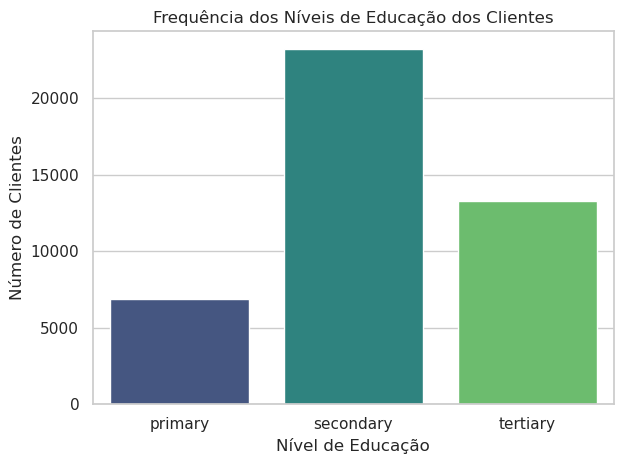

In [29]:
# Criando um gráfico de frêquencia
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Frequência dos Níveis de Educação dos Clientes')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Como podemos observar na tabela de percentuais e no gráfico de frequência, aproximadamente 53,52% dos clientes possuem um nível de educação secundário (secondary). De acordo com os dados da tabela de variáveis, definimos que o nível de educação secundário corresponde a pessoas que completaram o ensino médio (*high school*). A segunda categoria mais prevalente na base de dados são os clientes com um nível de educação terciário (*tertiary*), que consideramos como pessoas que possuem um diploma universitário ou que cursaram alguma faculdade, representando 30,68% dos clientes.

Como já mencionado, a proposta desta etapa do projeto é entender melhor quais tipos de clientes apresentam conversão por meio do marketing direto. No entanto, também podemos analisar a frequência dos níveis de educação entre os clientes que aceitaram fazer o depósito a prazo.

In [32]:
# Criando uma tabela de frequência
education_y_counts = X[y.values == 'yes']['education'].value_counts().sort_index()
education_y_percentages = (education_y_counts * 100 / sum(education_y_counts.values))
print(education_y_percentages)

education
primary     11.7332
secondary   48.6401
tertiary    39.6268
Name: count, dtype: float64


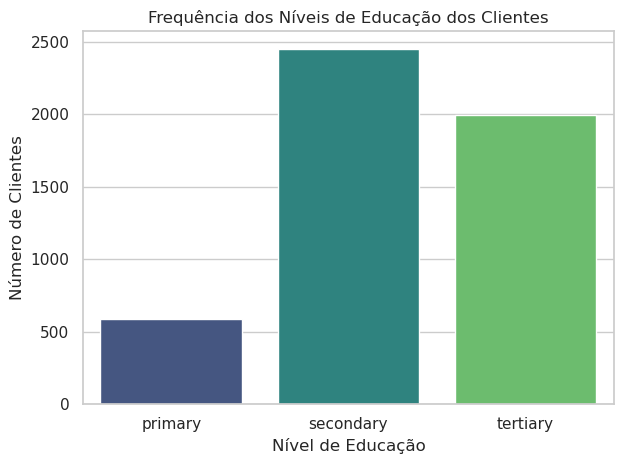

In [33]:
# Criando um gráfico de frêquencia
sns.barplot(x=education_y_counts.index, y=education_y_counts.values, palette='viridis')
plt.title('Frequência dos Níveis de Educação dos Clientes')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Ao analisarmos o nível de educação dos clientes que aceitaram fazer o depósito a prazo, observamos uma mudança significativa. A distribuição entre clientes com nível de educação terciário e secundário se torna mais equilibrada, representando aproximadamente 39,63% e 48,64%, respectivamente. Esse equilíbrio pode estar relacionado ao perfil dos clientes mais propensos à conversão por meio do telemarketing, que inclui administradores, técnicos, gerentes, trabalhadores manuais e aposentados. Normalmente, trabalhadores manuais, que podem ser menos favorecidos economicamente, têm um nível de educação mais baixo, enquanto os profissionais das outras categorias mencionadas geralmente possuem níveis de educação superior.

Para verificar se as afirmações mencionadas são de fato reais, podemos utilizar o mesmo gráfico de proporção empregado na seção anterior. Esse gráfico mostrará a distribuição de cada nível de educação em relação às diferentes categorias de trabalho.



### Trabalho e Nível de Educação

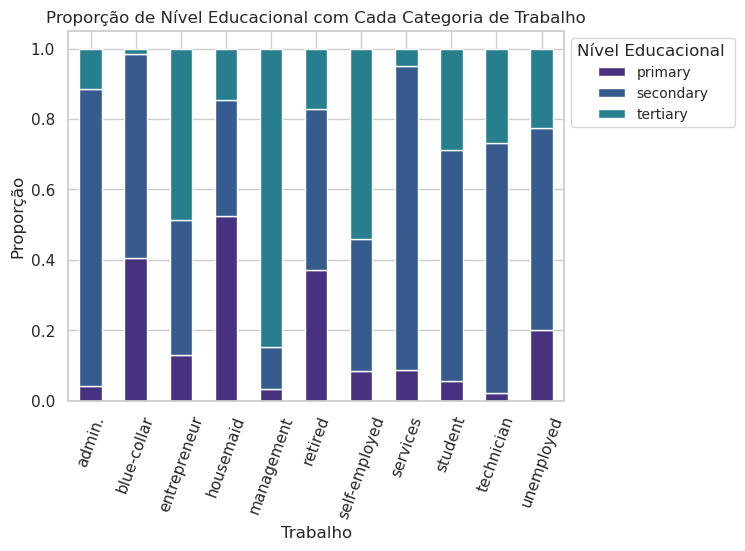

In [38]:
#Criando uma tabela cruzada
job_education_counts = pd.crosstab(X['job'], X['education'])
job_education_counts_normalized = job_education_counts.div(job_education_counts.sum(axis=1), axis=0)

# Plotar gráfico de mosaico
sns.set_theme(style="whitegrid", palette='viridis')
job_education_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Nível Educacional com Cada Categoria de Trabalho')
plt.legend(title='Nível Educacional ', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


Como era de se esperar, os trabalhadores manuais e os trabalhadores domésticos são as categorias com maior proporção de pessoas com nível de educação primária, representando aproximadamente 40% e 50%, respectivamente. Por outro lado, gerentes, empresário e trabalhadores autônomos são os clientes com a maior proporção de nível de educação terciário. É interessante notar que os aposentados apresentam uma distribuição mais equilibrada entre as três classificações de nível educacional. As demais categorias de trabalho tendem a ter uma maior proporção de clientes com nível de educação secundário.

<Figure size 1000x700 with 0 Axes>

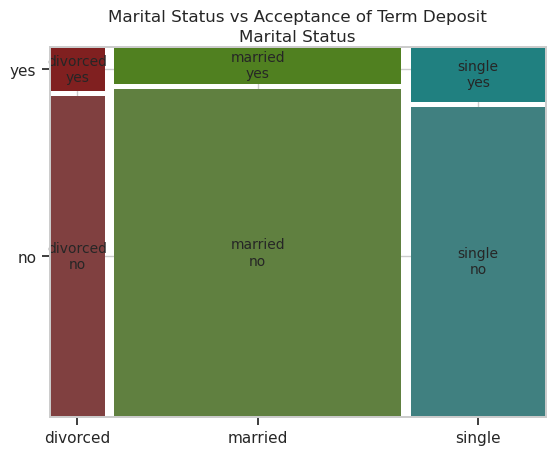

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Supondo que X e y sejam DataFrames ou Series
# Cria um DataFrame combinando X e y
df = X.copy()
df['y'] = y

# Cria a tabela de contingência
contingency_table = pd.crosstab(df['marital'], df['y'])

# Plot do gráfico de mosaico
plt.figure(figsize=(10, 7))
mosaic(contingency_table.stack(), gap=0.02, title='Marital Status vs Acceptance of Term Deposit')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance')
plt.show()
